

# **Will you skip this music track or not?**


The public part of the dataset consists of roughly 130 million listening sessions with associated user interactions on the Spotify service. 

The task is to predict whether individual tracks encountered in a listening session will be skipped by a particular user. In order to do this, complete information about the first half of a user’s listening session is provided, while the prediction is to be carried out on the second half. Participants have access to metadata, as well as acoustic descriptors, for all the tracks encountered in listening sessions.

https://www.aicrowd.com/challenges/spotify-sequential-skip-prediction-challenge

Brost, B., Mehrotra, R., & Jehan, T. (2019, May). The music streaming sessions dataset. In The World Wide Web Conference (pp. 2594-2600).



As the entire dataset is too big to experiment data manipulation, Spotify provided a mini dataset for this purpose.

In this script, we will do data wrangling to inspect the quality of the data, and do data engineering to generate features for machine learning modeling.


# Mount Google drive to Colab

In [91]:

from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/Capstone_SpotifyStreaming/notebooks

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Capstone_SpotifyStreaming/notebooks


In [92]:
%matplotlib inline

In [93]:
# install pandas_profiling for auto data inspection

import pandas_profiling
from pandas_profiling import ProfileReport 

In [94]:
# load the track information (mini version)

tf_df = pd.read_csv('../data/raw/data/track_features/tf_mini.csv')
log_df = pd.read_csv('../data/raw/data/training_set/log_mini.csv')



In [95]:
tf_df.head()

,track_id,duration,release_year,us_popularity_estimate,acousticness,beat_strength,bounciness,danceability,dyn_range_mean,energy,...,time_signature,valence,acoustic_vector_0,acoustic_vector_1,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7
0,t_a540e552-16d4-42f8-a185-232bd650ea7d,109.706673,1950,99.975414,0.458040,0.519497,0.504949,0.399767,7.511880,0.817709,...,4,0.935512,-0.033284,-0.411896,-0.028580,0.349438,0.832467,-0.213871,-0.299464,-0.675907
1,t_67965da0-132b-4b1e-8a69-0ef99b32287c,187.693329,1950,99.969430,0.916272,0.419223,0.545530,0.491235,9.098376,0.154258,...,3,0.359675,0.145703,-0.850372,0.123860,0.746904,0.371803,-0.420558,-0.213120,-0.525795
2,t_0614ecd3-a7d5-40a1-816e-156d5872a467,160.839996,1951,99.602549,0.812884,0.425890,0.508280,0.491625,8.368670,0.358813,...,4,0.726769,0.021720,-0.743634,0.333247,0.568447,0.411094,-0.187749,-0.387599,-0.433496
3,t_070a63a0-744a-434e-9913-a97b02926a29,175.399994,1951,99.665018,0.396854,0.400934,0.359990,0.552227,5.967346,0.514585,...,4,0.859075,0.039143,-0.267555,-0.051825,0.106173,0.614825,-0.111419,-0.265953,-0.542753
4,t_d6990e17-9c31-4b01-8559-47d9ce476df1,369.600006,1951,99.991764,0.728831,0.371328,0.335115,0.483044,5.802681,0.721442,...,4,0.562343,0.131931,-0.292523,-0.174819,-0.034422,0.717229,-0.016239,-0.392694,-0.455496


In [96]:
tf_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50704 entries, 0 to 50703
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   track_id                50704 non-null  object 
 1   duration                50704 non-null  float64
 2   release_year            50704 non-null  int64  
 3   us_popularity_estimate  50704 non-null  float64
 4   acousticness            50704 non-null  float64
 5   beat_strength           50704 non-null  float64
 6   bounciness              50704 non-null  float64
 7   danceability            50704 non-null  float64
 8   dyn_range_mean          50704 non-null  float64
 9   energy                  50704 non-null  float64
 10  flatness                50704 non-null  float64
 11  instrumentalness        50704 non-null  float64
 12  key                     50704 non-null  int64  
 13  liveness                50704 non-null  float64
 14  loudness                50704 non-null

In [97]:
# load the listening session data (mini version)

log_df.head(20).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
session_id,0_00006f66-33e5-4de7-a324-2d18e439fc1e,0_00006f66-33e5-4de7-a324-2d18e439fc1e,0_00006f66-33e5-4de7-a324-2d18e439fc1e,0_00006f66-33e5-4de7-a324-2d18e439fc1e,0_00006f66-33e5-4de7-a324-2d18e439fc1e,0_00006f66-33e5-4de7-a324-2d18e439fc1e,0_00006f66-33e5-4de7-a324-2d18e439fc1e,0_00006f66-33e5-4de7-a324-2d18e439fc1e,0_00006f66-33e5-4de7-a324-2d18e439fc1e,0_00006f66-33e5-4de7-a324-2d18e439fc1e,0_00006f66-33e5-4de7-a324-2d18e439fc1e,0_00006f66-33e5-4de7-a324-2d18e439fc1e,0_00006f66-33e5-4de7-a324-2d18e439fc1e,0_00006f66-33e5-4de7-a324-2d18e439fc1e,0_00006f66-33e5-4de7-a324-2d18e439fc1e,0_00006f66-33e5-4de7-a324-2d18e439fc1e,0_00006f66-33e5-4de7-a324-2d18e439fc1e,0_00006f66-33e5-4de7-a324-2d18e439fc1e,0_00006f66-33e5-4de7-a324-2d18e439fc1e,0_00006f66-33e5-4de7-a324-2d18e439fc1e
session_position,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
session_length,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20
track_id_clean,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,t_9099cd7b-c238-47b7-9381-f23f2c1d1043,t_fc5df5ba-5396-49a7-8b29-35d0d28249e0,t_23cff8d6-d874-4b20-83dc-94e450e8aa20,t_64f3743c-f624-46bb-a579-0f3f9a07a123,t_c815228b-3212-4f9e-9d4f-9cb19b248184,t_e23c19f5-4c32-4557-aa44-81372c2e3705,t_0be6eced-f56f-48bd-8086-f2e0b760fdee,t_f3ecbd3b-9e8e-4557-b8e0-39cfcd7e65dd,t_2af4dfa0-7df3-4b7e-b7ab-353ba48237f9,t_79570b2a-639a-4ec0-9853-71c5299ac44d,t_69016f19-84aa-40c0-afa9-54404397b7a2,t_59dc3fcd-7aec-4da5-a747-b59b19bab3bb,t_a157ba98-7eae-4e7d-99d5-ed760b2c0978,t_87d95b75-af5c-4ef6-8dc4-cd888ae17cce,t_db945033-3dc5-4a22-8889-c72fd2781299,t_bff5b6c6-6968-41be-b723-7e860b372975,t_bf496d77-9eb2-4fe1-80f7-2c7ecd6f9b8e,t_1051bc37-1a73-4301-812b-f83ae0c9bbcd,t_358c9cce-7a1e-4dd4-81de-206dda80363f
skip_1,False,False,False,False,False,False,True,True,False,True,True,True,True,False,False,False,False,False,True,True
skip_2,False,False,False,False,False,False,True,True,True,True,True,True,True,False,True,True,True,True,True,True
skip_3,False,False,False,False,False,True,True,True,True,True,True,True,True,False,True,True,True,True,True,True
not_skipped,True,True,True,True,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
context_switch,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
no_pause_before_play,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1


In [98]:
log_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167880 entries, 0 to 167879
Data columns (total 21 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   session_id                       167880 non-null  object
 1   session_position                 167880 non-null  int64 
 2   session_length                   167880 non-null  int64 
 3   track_id_clean                   167880 non-null  object
 4   skip_1                           167880 non-null  bool  
 5   skip_2                           167880 non-null  bool  
 6   skip_3                           167880 non-null  bool  
 7   not_skipped                      167880 non-null  bool  
 8   context_switch                   167880 non-null  int64 
 9   no_pause_before_play             167880 non-null  int64 
 10  short_pause_before_play          167880 non-null  int64 
 11  long_pause_before_play           167880 non-null  int64 
 12  hist_user_behavi

In [99]:
log_df['hist_user_behavior_reason_start'].unique()

array(['trackdone', 'fwdbtn', 'backbtn', 'clickrow', 'appload', 'playbtn',
       'remote', 'trackerror', 'endplay'], dtype=object)

In [100]:
log_df['hist_user_behavior_reason_end'].unique()

array(['trackdone', 'fwdbtn', 'backbtn', 'endplay', 'logout', 'remote',
       'clickrow'], dtype=object)

In [101]:
log_df['context_type'].unique()

array(['editorial_playlist', 'user_collection', 'radio',
       'personalized_playlist', 'catalog', 'charts'], dtype=object)

It appears that the 'hist_user_behavior_reason_start','hist_user_behavior_reason_end', and 'context_type' columns need to be dummy-coded.

# Chech the features of log

In [102]:
log_df.head().T

,0,1,2,3,4
session_id,0_00006f66-33e5-4de7-a324-2d18e439fc1e,0_00006f66-33e5-4de7-a324-2d18e439fc1e,0_00006f66-33e5-4de7-a324-2d18e439fc1e,0_00006f66-33e5-4de7-a324-2d18e439fc1e,0_00006f66-33e5-4de7-a324-2d18e439fc1e
session_position,1,2,3,4,5
session_length,20,20,20,20,20
track_id_clean,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,t_9099cd7b-c238-47b7-9381-f23f2c1d1043,t_fc5df5ba-5396-49a7-8b29-35d0d28249e0,t_23cff8d6-d874-4b20-83dc-94e450e8aa20,t_64f3743c-f624-46bb-a579-0f3f9a07a123
skip_1,False,False,False,False,False
skip_2,False,False,False,False,False
skip_3,False,False,False,False,False
not_skipped,True,True,True,True,True
context_switch,0,0,0,0,0
no_pause_before_play,0,1,1,1,1


# Check the skipping rate
As the goal of this capstone project is to predict the skipping behavior, it is essential to check the rate of skipping at an early ('skip_1'), mid ('skip_2'), or late ('skip_3') stage.

In [103]:
# check the distribution of skipping
# note that if 'skip_1' is True, then all the subsequent skips are coded as True too
print('early skipping rate: ',log_df['skip_1'].mean())
print('mid skipping rate: ',log_df['skip_2'].mean()-log_df['skip_1'].mean())
print('late skipping rate: ',log_df['skip_3'].mean()-log_df['skip_2'].mean())
print('ultra late skipping rate: ',1- log_df['not_skipped'].mean() - log_df['skip_3'].mean())
print('skipping rate (regardless time point): ',1-log_df['not_skipped'].mean())

early skipping rate:  0.42150345484870144
mid skipping rate:  0.09567548248749103
late skipping rate:  0.1312008577555397
ultra late skipping rate:  0.018739575887538718
skipping rate (regardless time point):  0.6671193709792709


In general, there are very few mid to ultra late termination cases (total: 24%), compared to early termination (42.2%), at least in this mini dataset. Therefore, as the first step, it is probably easier to focus on whether a track was skipped or not, regardless of the stage, as the ratio was much more balanced (66% vs. 33%).

# Check the features of sessions
As the data has a nested structure, rows should be grouped into sessions. So here I am exploring the features of sessions. 

In [104]:
log_df_s_mean = log_df.groupby(['session_id']).mean()
log_df_s_mean.head().T

session_id,0_00006f66-33e5-4de7-a324-2d18e439fc1e,0_0000a72b-09ac-412f-b452-9b9e79bded8f,0_00010fc5-b79e-4cdf-bc4c-f140d0f99a3a,0_00016a3d-9076-4f67-918f-f29e3ce160dc,0_00018b58-deb8-4f98-ac5e-d7e01b346130
session_position,10.50,10.50,10.50,10.50,6.000000
session_length,20.00,20.00,20.00,20.00,11.000000
skip_1,0.40,0.45,0.60,0.70,0.090909
skip_2,0.65,0.50,0.60,0.80,0.090909
skip_3,0.70,0.50,0.80,0.80,0.454545
not_skipped,0.30,0.30,0.10,0.20,0.545455
context_switch,0.00,0.00,0.00,0.00,0.090909
no_pause_before_play,0.90,0.80,0.70,0.35,0.818182
short_pause_before_play,0.05,0.15,0.15,0.60,0.090909
long_pause_before_play,0.05,0.15,0.25,0.60,0.090909


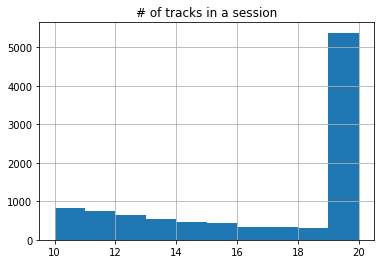

In [105]:
log_df_s_mean['session_length'].hist()
plt.title('# of tracks in a session')
plt.show()


In [106]:
print('% of sessions have 20 tracks:',(log_df_s_mean['session_length']==20).mean())


% of sessions have 20 tracks: 0.5066


In [107]:
print('% of premium users:',log_df_s_mean['premium'].mean())


% of premium users: 0.8029797368421052


In [108]:
log_df['hist_user_behavior_reason_start'].head()

0    trackdone
1    trackdone
2    trackdone
3    trackdone
4    trackdone
Name: hist_user_behavior_reason_start, dtype: object

# Remove the columns which contains the information after playing each track.

Some columns in the log dataframe contains the information which can only be acquired after a track (or the entire session) is played. For example, the 'session_length' and 'hist_user_behavior_reason_end' won't be known when a track is being played. To respect the temporal order, these columns need to be removed before model fitting.

In [109]:
log_df2 = log_df.drop(columns = ['session_length',  'hist_user_behavior_reason_end', 'hist_user_behavior_n_seekfwd','hist_user_behavior_n_seekback'])

# Visualize the features of the tracks

In [110]:
tf_df.head(10).T

,0,1,2,3,4,5,6,7,8,9
track_id,t_a540e552-16d4-42f8-a185-232bd650ea7d,t_67965da0-132b-4b1e-8a69-0ef99b32287c,t_0614ecd3-a7d5-40a1-816e-156d5872a467,t_070a63a0-744a-434e-9913-a97b02926a29,t_d6990e17-9c31-4b01-8559-47d9ce476df1,t_fcb90952-0c6d-4644-86ac-951f6ec4b3ff,t_20675f8a-3a40-40b8-aa9b-0ce64536c65b,t_7577ca53-5d0b-489b-a6df-ade8bbc895ef,t_8a461a4e-62e4-4e00-8433-f7f034fa9887,t_ae523005-8e7b-4746-abb7-3f401b973a33
duration,109.706673,187.693329,160.839996,175.399994,369.600006,178.399994,165.826675,197.826675,214.866669,281.160004
release_year,1950,1950,1951,1951,1951,1951,1952,1952,1954,1954
us_popularity_estimate,99.975414,99.96943,99.602549,99.665018,99.991764,99.98387,99.958695,99.454159,99.983466,97.436986
acousticness,0.45804,0.916272,0.812884,0.396854,0.728831,0.185908,0.518601,0.786521,0.155316,0.941446
beat_strength,0.519497,0.419223,0.42589,0.400934,0.371328,0.549373,0.592388,0.472212,0.525873,0.232828
bounciness,0.504949,0.54553,0.50828,0.35999,0.335115,0.579418,0.640258,0.448498,0.566486,0.209133
danceability,0.399767,0.491235,0.491625,0.552227,0.483044,0.74374,0.740621,0.426819,0.523287,0.242102
dyn_range_mean,7.51188,9.098376,8.36867,5.967346,5.802681,8.666988,9.531035,6.914297,8.629132,4.826611
energy,0.817709,0.154258,0.358813,0.514585,0.721442,0.567959,0.614633,0.217525,0.626335,0.095803


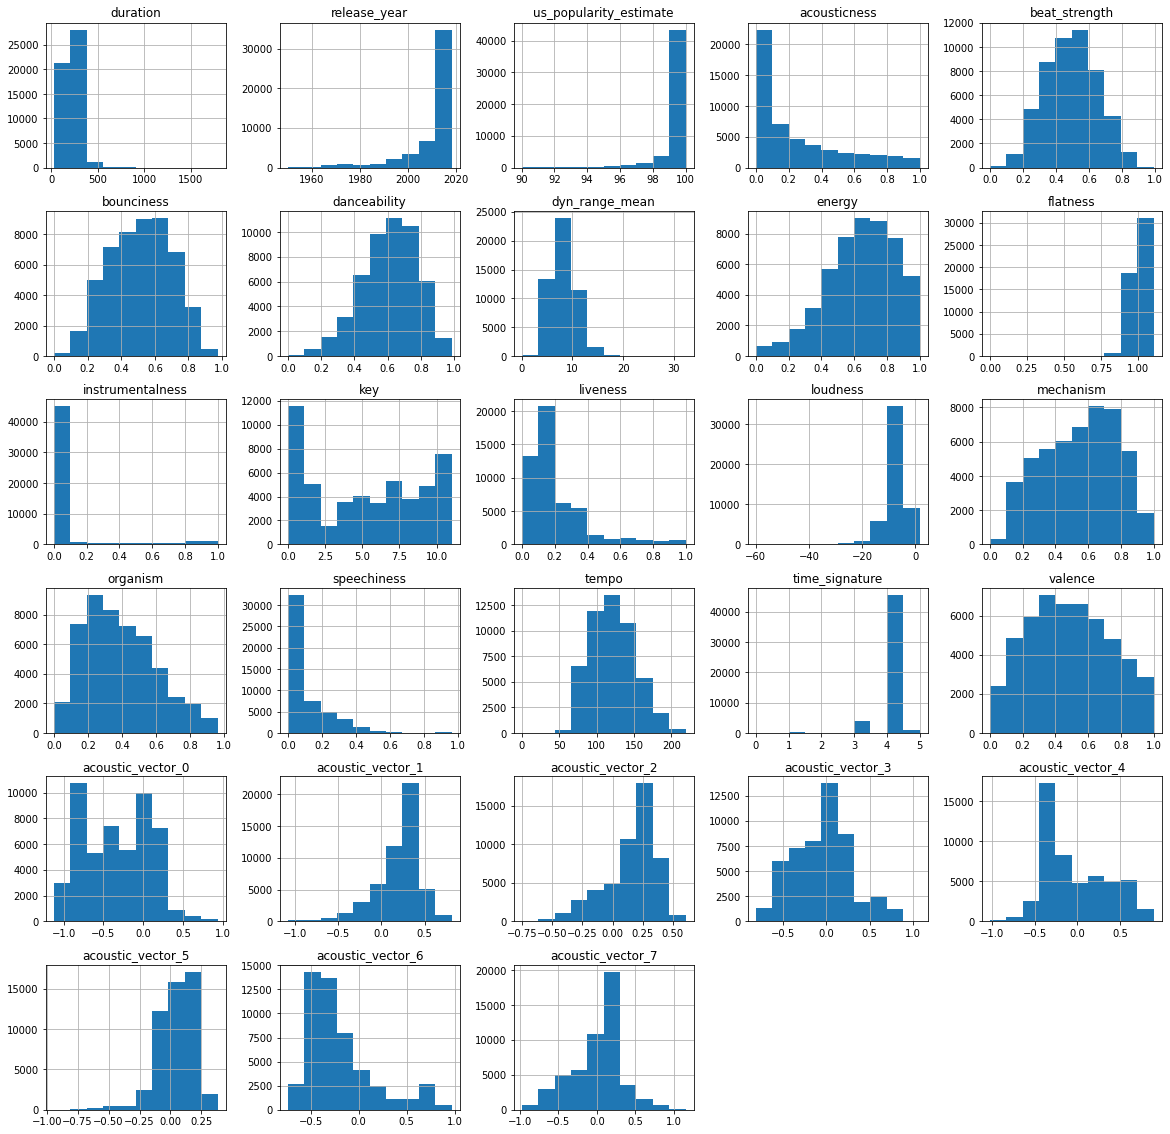

In [111]:
tf_hist = tf_df.hist(figsize = (20,20))

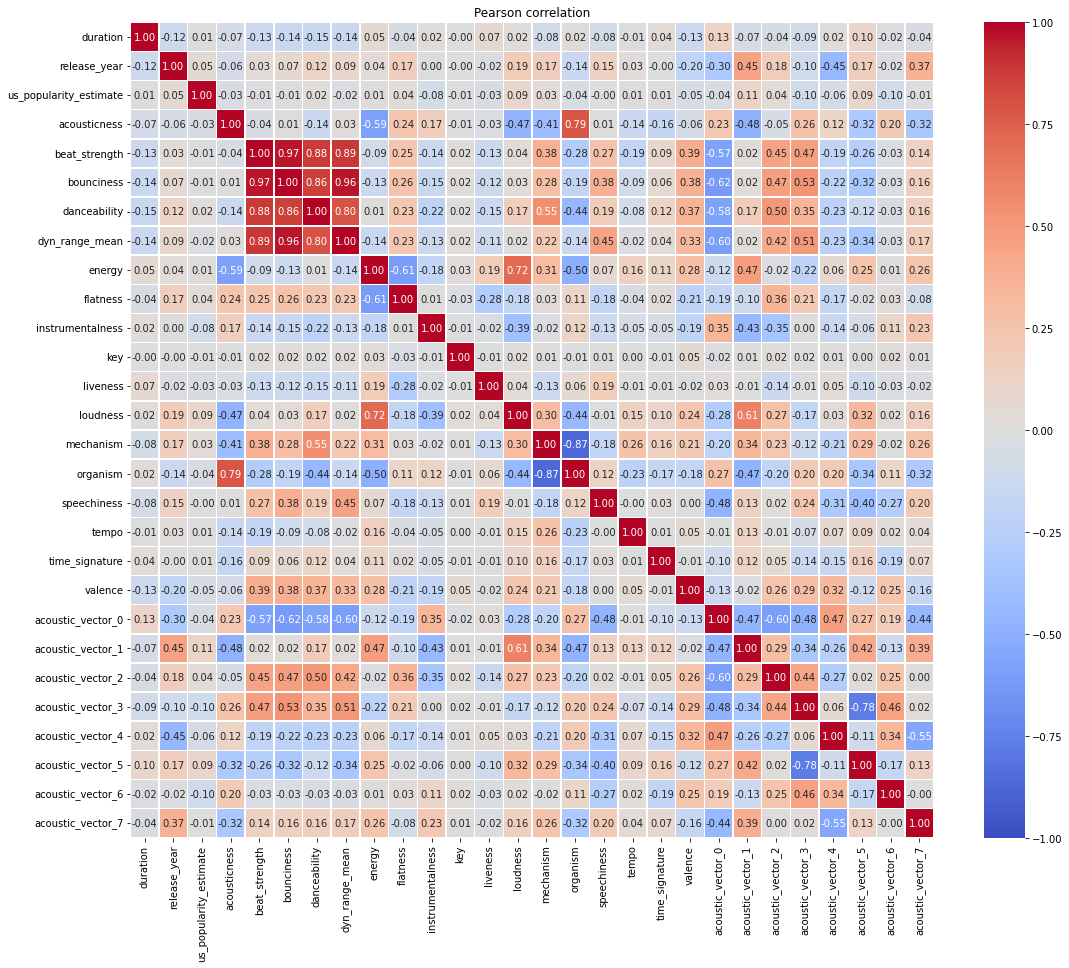

In [112]:
fig, ax = plt.subplots(figsize=(18,15)) 
sns.heatmap( tf_df.corr(method='pearson'), linewidth = 0.5 , cmap = 'coolwarm', vmin=-1, vmax=1, annot=True, fmt=".2f", ax = ax)
plt.title('Pearson correlation')
plt.show()

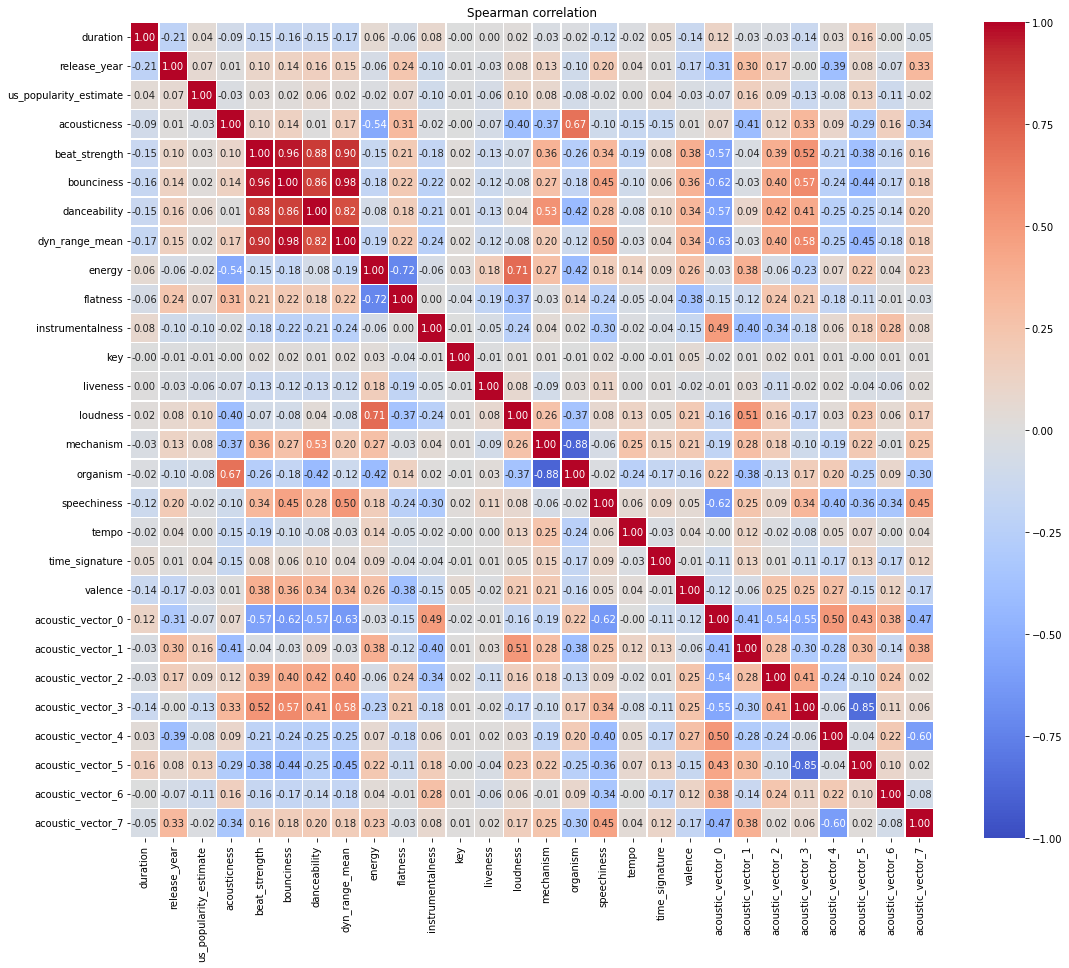

In [113]:
fig, ax = plt.subplots(figsize=(18,15)) 
sns.heatmap( tf_df.corr(method='spearman'), linewidth = 0.5 , cmap = 'coolwarm', vmin=-1, vmax=1, annot=True, fmt=".2f", ax = ax)
plt.title('Spearman correlation')
plt.show()

In [114]:
tf_df['mode'].unique()

array(['major', 'minor'], dtype=object)

The EDA of the track data showed that (1) the major/minor mode needs to be coded as 'is_major' (boolean), (2) 'key' and 'time_signature' are categorical and should be dummy coded, and (3) there are high correlations among 'beat_strength', 'bounciness', 'danceability', and 'dyn_range_mean'. The (3) makes sense as these features are closely related. But the collinearity issue might arise when including all these factors into the same model. 

# Re-code the columns

In [115]:
# the major/minor mode needs to be coded as 'is_major' (boolean)
tf_df['is_major'] = tf_df['mode']=='major'
tf_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50704 entries, 0 to 50703
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   track_id                50704 non-null  object 
 1   duration                50704 non-null  float64
 2   release_year            50704 non-null  int64  
 3   us_popularity_estimate  50704 non-null  float64
 4   acousticness            50704 non-null  float64
 5   beat_strength           50704 non-null  float64
 6   bounciness              50704 non-null  float64
 7   danceability            50704 non-null  float64
 8   dyn_range_mean          50704 non-null  float64
 9   energy                  50704 non-null  float64
 10  flatness                50704 non-null  float64
 11  instrumentalness        50704 non-null  float64
 12  key                     50704 non-null  int64  
 13  liveness                50704 non-null  float64
 14  loudness                50704 non-null

In [116]:
tf_df_dummy = pd.get_dummies(tf_df, columns=['key','time_signature'])
tf_df_dummy.head().T

,0,1,2,3,4
track_id,t_a540e552-16d4-42f8-a185-232bd650ea7d,t_67965da0-132b-4b1e-8a69-0ef99b32287c,t_0614ecd3-a7d5-40a1-816e-156d5872a467,t_070a63a0-744a-434e-9913-a97b02926a29,t_d6990e17-9c31-4b01-8559-47d9ce476df1
duration,109.706673,187.693329,160.839996,175.399994,369.600006
release_year,1950,1950,1951,1951,1951
us_popularity_estimate,99.975414,99.96943,99.602549,99.665018,99.991764
acousticness,0.45804,0.916272,0.812884,0.396854,0.728831
beat_strength,0.519497,0.419223,0.42589,0.400934,0.371328
bounciness,0.504949,0.54553,0.50828,0.35999,0.335115
danceability,0.399767,0.491235,0.491625,0.552227,0.483044
dyn_range_mean,7.51188,9.098376,8.36867,5.967346,5.802681
energy,0.817709,0.154258,0.358813,0.514585,0.721442


In [117]:
log_df_dummy = pd.get_dummies(log_df2, columns=['hist_user_behavior_reason_start', 'context_type'])
log_df_dummy.head().T



,0,1,2,3,4
session_id,0_00006f66-33e5-4de7-a324-2d18e439fc1e,0_00006f66-33e5-4de7-a324-2d18e439fc1e,0_00006f66-33e5-4de7-a324-2d18e439fc1e,0_00006f66-33e5-4de7-a324-2d18e439fc1e,0_00006f66-33e5-4de7-a324-2d18e439fc1e
session_position,1,2,3,4,5
track_id_clean,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,t_9099cd7b-c238-47b7-9381-f23f2c1d1043,t_fc5df5ba-5396-49a7-8b29-35d0d28249e0,t_23cff8d6-d874-4b20-83dc-94e450e8aa20,t_64f3743c-f624-46bb-a579-0f3f9a07a123
skip_1,False,False,False,False,False
skip_2,False,False,False,False,False
skip_3,False,False,False,False,False
not_skipped,True,True,True,True,True
context_switch,0,0,0,0,0
no_pause_before_play,0,1,1,1,1
short_pause_before_play,0,0,0,0,0


# Merge 2 dataframes and perform some simple correlational analyses

In [118]:
df_merge = pd.merge(log_df_dummy, tf_df_dummy, how='left', left_on='track_id_clean', right_on = 'track_id')
print(len(df_merge))
df_merge.head()


167880


,session_id,session_position,track_id_clean,skip_1,skip_2,skip_3,not_skipped,context_switch,no_pause_before_play,short_pause_before_play,...,key_7,key_8,key_9,key_10,key_11,time_signature_0,time_signature_1,time_signature_3,time_signature_4,time_signature_5
0,0_00006f66-33e5-4de7-a324-2d18e439fc1e,1,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,False,False,False,True,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0_00006f66-33e5-4de7-a324-2d18e439fc1e,2,t_9099cd7b-c238-47b7-9381-f23f2c1d1043,False,False,False,True,0,1,0,...,1,0,0,0,0,0,0,0,1,0
2,0_00006f66-33e5-4de7-a324-2d18e439fc1e,3,t_fc5df5ba-5396-49a7-8b29-35d0d28249e0,False,False,False,True,0,1,0,...,0,0,0,1,0,0,0,0,1,0
3,0_00006f66-33e5-4de7-a324-2d18e439fc1e,4,t_23cff8d6-d874-4b20-83dc-94e450e8aa20,False,False,False,True,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,0_00006f66-33e5-4de7-a324-2d18e439fc1e,5,t_64f3743c-f624-46bb-a579-0f3f9a07a123,False,False,False,True,0,1,0,...,0,1,0,0,0,0,0,0,1,0


In [119]:
df_merge.select_dtypes(['number'])

,session_position,context_switch,no_pause_before_play,short_pause_before_play,long_pause_before_play,hour_of_day,hist_user_behavior_reason_start_appload,hist_user_behavior_reason_start_backbtn,hist_user_behavior_reason_start_clickrow,hist_user_behavior_reason_start_endplay,...,key_7,key_8,key_9,key_10,key_11,time_signature_0,time_signature_1,time_signature_3,time_signature_4,time_signature_5
0,1,0,0,0,0,16,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,2,0,1,0,0,16,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,3,0,1,0,0,16,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,4,0,1,0,0,16,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,5,0,1,0,0,16,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167875,16,0,1,0,0,13,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
167876,17,0,1,0,0,13,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
167877,18,0,1,0,0,13,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
167878,19,0,1,0,0,13,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [120]:
# check what correlated with 'not_skipped'
R_noskip = df_merge.drop(columns=['skip_1','skip_2','skip_3']).corr(method='spearman')
R_noskip['not_skipped'].index

Index(['session_position', 'not_skipped', 'context_switch',
       'no_pause_before_play', 'short_pause_before_play',
       'long_pause_before_play', 'hist_user_behavior_is_shuffle',
       'hour_of_day', 'premium', 'hist_user_behavior_reason_start_appload',
       'hist_user_behavior_reason_start_backbtn',
       'hist_user_behavior_reason_start_clickrow',
       'hist_user_behavior_reason_start_endplay',
       'hist_user_behavior_reason_start_fwdbtn',
       'hist_user_behavior_reason_start_playbtn',
       'hist_user_behavior_reason_start_remote',
       'hist_user_behavior_reason_start_trackdone',
       'hist_user_behavior_reason_start_trackerror', 'context_type_catalog',
       'context_type_charts', 'context_type_editorial_playlist',
       'context_type_personalized_playlist', 'context_type_radio',
       'context_type_user_collection', 'duration', 'release_year',
       'us_popularity_estimate', 'acousticness', 'beat_strength', 'bounciness',
       'danceability', 'dyn_range

In [121]:
# check what correlated with 'skip_1'
R_s1 = df_merge.drop(columns=['not_skipped','skip_2','skip_3']).corr(method='spearman')
R_s1['skip_1'].index

Index(['session_position', 'skip_1', 'context_switch', 'no_pause_before_play',
       'short_pause_before_play', 'long_pause_before_play',
       'hist_user_behavior_is_shuffle', 'hour_of_day', 'premium',
       'hist_user_behavior_reason_start_appload',
       'hist_user_behavior_reason_start_backbtn',
       'hist_user_behavior_reason_start_clickrow',
       'hist_user_behavior_reason_start_endplay',
       'hist_user_behavior_reason_start_fwdbtn',
       'hist_user_behavior_reason_start_playbtn',
       'hist_user_behavior_reason_start_remote',
       'hist_user_behavior_reason_start_trackdone',
       'hist_user_behavior_reason_start_trackerror', 'context_type_catalog',
       'context_type_charts', 'context_type_editorial_playlist',
       'context_type_personalized_playlist', 'context_type_radio',
       'context_type_user_collection', 'duration', 'release_year',
       'us_popularity_estimate', 'acousticness', 'beat_strength', 'bounciness',
       'danceability', 'dyn_range_mean

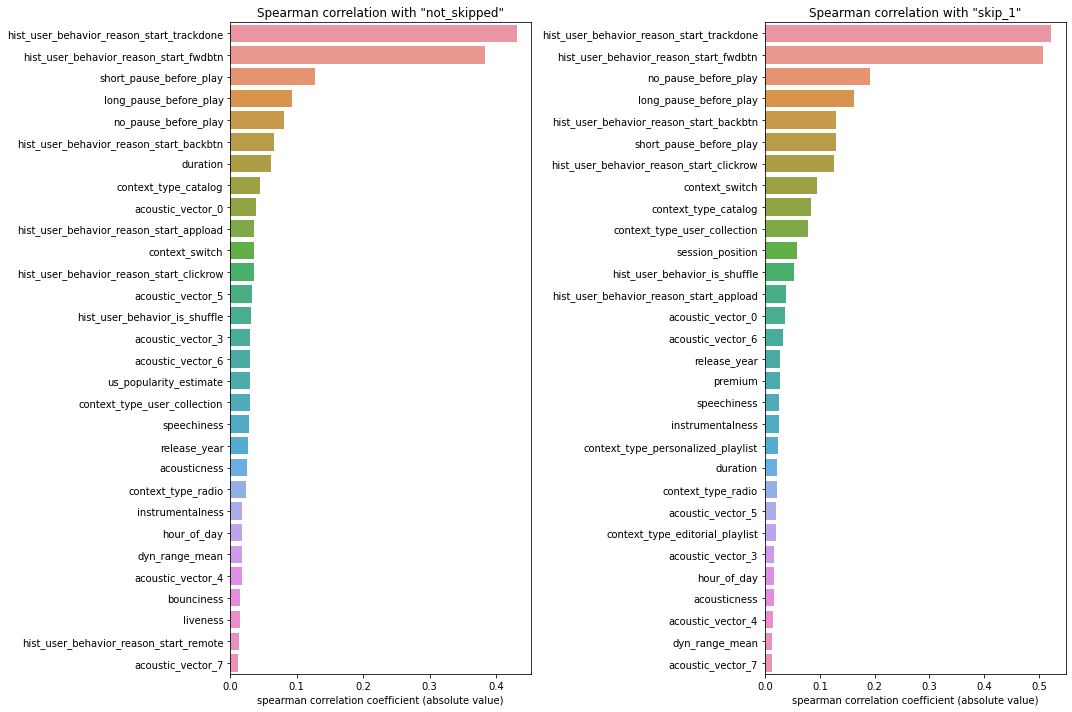

In [124]:
fig, (ax1, ax2) = plt.subplots(figsize=(15,10), ncols=2) 

sel_range = 30

R_noskip_sorted = np.abs(R_noskip['not_skipped'].drop('not_skipped')).sort_values(ascending=False)
sns.barplot(y=R_noskip_sorted[0:sel_range].index, x=R_noskip_sorted[0:sel_range], orient = 'h', ax = ax1)
ax1.set_xlabel('spearman correlation coefficient (absolute value)')
ax1.title.set_text('Spearman correlation with "not_skipped"')

R_s1_sorted = np.abs(R_s1['skip_1'].drop('skip_1')).sort_values(ascending=False)
sns.barplot(y=R_s1_sorted[0:sel_range].index, x=R_s1_sorted[0:sel_range], orient = 'h', ax = ax2)
ax2.set_xlabel('spearman correlation coefficient (absolute value)')
ax2.title.set_text('Spearman correlation with "skip_1"')

plt.tight_layout()
plt.show()

It appears that the features correlate with both 'not_skipped' and 'skip_1' are largely overlapped with similar weights.

There are still some differences. For example, 'duration' factor is more significantly associated with 'not_skipped', but it is not much important for 'skip_1'. It makes sense as early termination should have nothing to do with the length of the track, but the late termination might (e.g., getting bored with the current track).